# Prologue

- An existential problem for any major website today is how to handle toxic and divisive content. 
- Quora wants to tackle this problem head-on to keep their platform a place where users can feel safe sharing their knowledge with the world.
- Quora is a platform that empowers people to learn from each other. 
- On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. 
- A key challenge is to weed out insincere questions -- those **founded upon false premises**, or that **intend to make a statement rather than look for helpful answers**.

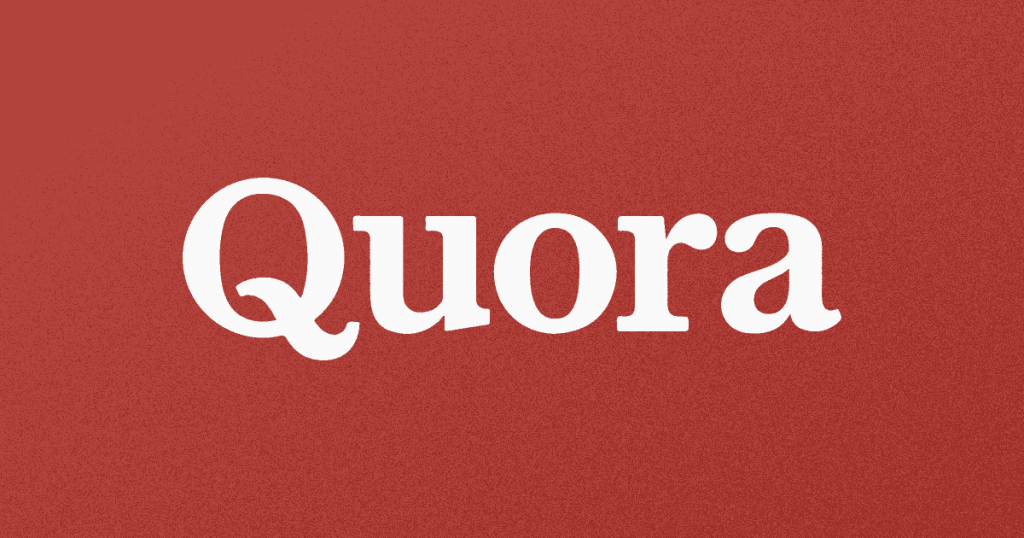

- I will try to follow Thomas Bayes and his game-changing theorem
- Thus, if we have certain classes, the probabiltiy of class $k$ is:
$$ P\bigg(C_{k} \text{ }\bigg | \bigcap_{i = 1}^{n} F_{i}\bigg) = P(C_{k}) \prod_{i = 1}^{n} P(F_{i}|C_{k})$$ 
- Where $n$ is the number of features

# Importing Modules

In [1]:
import re
import string
import numpy                   as     np
import pandas                  as     pd

import nltk
from   nltk.stem               import PorterStemmer
from   nltk.stem               import WordNetLemmatizer

from   sklearn.model_selection import train_test_split

In [2]:
#Just in case facing problems downloading NLTK assets
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhammadyousef/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muhammadyousef/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muhammadyousef/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/muhammadyousef/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Settings

In [4]:
pd.options.display.max_colwidth = 1000

# Dataset

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.shape

(1306122, 3)

In [7]:
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province as a nation in the 1960s?,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you encourage people to adopt and not shop?",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity affect space geometry?,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg hemispheres?,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain bike by just changing the tyres?,0


In [8]:
df = df[['question_text', 'target']]

In [9]:
df.head()

,question_text,target
0,How did Quebec nationalists see their province as a nation in the 1960s?,0
1,"Do you have an adopted dog, how would you encourage people to adopt and not shop?",0
2,Why does velocity affect time? Does velocity affect space geometry?,0
3,How did Otto von Guericke used the Magdeburg hemispheres?,0
4,Can I convert montra helicon D to a mountain bike by just changing the tyres?,0


## Sincere Vs. Insincere

- Insincere questions are questions spreading hatred against a group of people or is not real.

In [10]:
#Sincere
df[df['target'] == 0].sample(5)

,question_text,target
1205796,Where can I get WordPress themes and plugins to create a school and a church website?,0
829966,How much would it cost to buy a small country?,0
824730,Is YouTube replacing Telivision?,0
909061,Which is the best institute in Delhi?,0
194309,What age is too old to start drinking coffee?,0


In [11]:
#Insincere
df[df['target'] == 1].sample(5)

,question_text,target
843075,Why do Indian girls have a black pussy although they have white skin?,1
350140,"Do most people consider whites to be Homo sapiens, considering their Neanderthal background? I assume that whites are humanoid relatives that are mentally inferior to Homo sapiens.",1
506882,"Given their privileged backgrounds, would people like Donald Trump or Paris Hilton be able to perform the house cleaning/maintenance/repair job of opening a safety cap on a detergent bottle?",1
1232898,Which low-investment businesses are most profitable in the world?,1
46311,Why do Tamil language propagandists behave like chauvinists to suggest as though the whole world's vocabulary originated from it?,1


## Balancing Data

In [12]:
df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [13]:
df = df[df['target'] == 1].append(df[df['target'] == 0].sample(80810)).sample(frac = 1).reset_index(drop = True)

In [14]:
df['target'].value_counts()

1    80810
0    80810
Name: target, dtype: int64

In [15]:
df.shape

(161620, 2)

# Text Preprocessing

## Removing Numbers

In [16]:
df['question_text'] = df['question_text'].apply(lambda question: re.sub(r'\d+', '', question))

In [17]:
df.head()

,question_text,target
0,Does the US Department of Defence (DoD) fund Ebola trials on humans?,1
1,Why is pressure area graph not linear?,0
2,"Which country is better in terms of Special Forces and Intelligence Department, India Or China Or Pakistan?",1
3,Will the men’s righhs movement ever get stronger than the radical feminist movement?,1
4,"Are all black people forced to have the same opinion in America? For example, will a black person be criticized by his own race for being conservative?",1


## Removing Punctuation

In [18]:
df['question_text'] = df['question_text'].apply(lambda question: question.translate(question.maketrans("", "", string.punctuation)))

In [19]:
df.head()

,question_text,target
0,Does the US Department of Defence DoD fund Ebola trials on humans,1
1,Why is pressure area graph not linear,0
2,Which country is better in terms of Special Forces and Intelligence Department India Or China Or Pakistan,1
3,Will the men’s righhs movement ever get stronger than the radical feminist movement,1
4,Are all black people forced to have the same opinion in America For example will a black person be criticized by his own race for being conservative,1


## Normalizing (Lowercase)

In [20]:
df['question_text'] = df['question_text'].apply(lambda question: ' '.join([word.lower() for word in question.split()]))

In [21]:
df.head()

,question_text,target
0,does the us department of defence dod fund ebola trials on humans,1
1,why is pressure area graph not linear,0
2,which country is better in terms of special forces and intelligence department india or china or pakistan,1
3,will the men’s righhs movement ever get stronger than the radical feminist movement,1
4,are all black people forced to have the same opinion in america for example will a black person be criticized by his own race for being conservative,1


## Stop-Words Removal

In [22]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [23]:
df['question_text'] = df['question_text'].apply(lambda question: ' '.join(list(set(question.split(' ')) - stop_words)))

In [24]:
df.head()

,question_text,target
0,department us fund trials ebola dod defence humans,1
1,area linear graph pressure,0
2,department china pakistan intelligence country terms better forces india special,1
3,feminist movement stronger righhs get radical men’s ever,1
4,black person opinion race example america conservative criticized people forced,1


## Lemmatizing

In [25]:
lemmatizer = WordNetLemmatizer()

In [26]:
df['question_text'] = df['question_text'].apply(lambda question: ' '.join([lemmatizer.lemmatize(word) for word in question.split()]))

In [27]:
df.head()

,question_text,target
0,department u fund trial ebola dod defence human,1
1,area linear graph pressure,0
2,department china pakistan intelligence country term better force india special,1
3,feminist movement stronger righhs get radical men’s ever,1
4,black person opinion race example america conservative criticized people forced,1


# Splitting The Dataset

In [28]:
train, test = train_test_split(df, test_size = 0.2, random_state = 0)

In [29]:
train.shape

(129296, 2)

In [30]:
train.head()

,question_text,target
49698,gordan iii opinion obessed thought miller people india,0
70703,west caucasian rush lambasting american genre wear make conservative suddenly kanye like spent come cap music rapper decade america great aid hop limbaugh hip,0
161183,included weight help training still burning workout increase cardio routine lost gym plus kg lose july fast fat working,0
45736,article write know subject idiot nothing,1
136634,lazy day devolved tv theyre race video family watch game stupid human play nothing,1


In [31]:
test.shape

(32324, 2)

In [32]:
test.head()

,question_text,target
149293,realize feminist genitalia way guy sit manspreading,1
20449,troll acknowledge factory putin russia existence,1
59275,dude feel asked question know relationship million answer indian quora,1
132544,done whats spouse sexist ever thing,0
84253,selling enterprise dent scaled slack made even fortune within break startup hasnt much able yet,0


# Building The Naive-Bayes Classifier

## Getting FreqDist For Each Class

In [33]:
sincere_freqDist = {}

for word in ' '.join(list(df[df['target'] == 0]['question_text'])).split():
    if word in sincere_freqDist.keys():
        sincere_freqDist[word] += 1
    else:
        sincere_freqDist[word] = 1

In [34]:
insincere_freqDist = {}

for word in ' '.join(list(df[df['target'] == 1]['question_text'])).split():
    if word in insincere_freqDist.keys():
        insincere_freqDist[word] += 1
    else:
        insincere_freqDist[word] = 1

## Calculating $P(Sincere)$

In [35]:
p_sincere = len(df[df['target'] == 0]) / len(df)

## Calculating $P(Insincere)$

In [36]:
p_insincere = len(df[df['target'] == 1]) / len(df)

##  Calculating $P(Question|Sincere)$ and $P(Question|Insincere)$

In [38]:
len(set(' '.join(df['question_text']).split()))

64483

In [39]:
def probability_question_given_class(question):
    
    sincere_probability = insincere_probability = 1
    
    for word in question.split():
        try:
            word_in_sincere = sincere_freqDist[word]
        except Exception as e:
            word_in_sincere = 0
            
        try:
            word_in_insincere = insincere_freqDist[word]
        except Exception as e:
            word_in_insincere = 0
        
        len_unique_words = 64483
        
        sincere_probability *= (word_in_sincere + 1) / ( sum(sincere_freqDist.values()) + len_unique_words )
        insincere_probability *= (word_in_insincere + 1) / ( sum(insincere_freqDist.values()) + len_unique_words )
            
    return sincere_probability, insincere_probability

## Classifing A New Question

In [40]:
def classify(question):
    
    if type(question) != str:
        return
    
    p_question_given_sincere, p_question_given_insincere = probability_question_given_class(question)
    
    p_sincere_question = p_question_given_sincere * p_sincere
    p_insincere_question = p_question_given_insincere * p_insincere
    
    if p_sincere_question >= p_insincere_question:
        return 0
    else:
        return 1

# Calculating Accuracy

In [41]:
test = test[test['target'] == 1].sample(500).append(test[test['target'] == 0].sample(500)).sample(frac = 1).reset_index(drop = True)

In [42]:
test.shape

(1000, 2)

In [43]:
actual_classes = test['target']

In [44]:
predicted_classes = []
for question in test['question_text']:
    predicted_classes.append(classify(question))

In [45]:
trues = 0
for (x, y) in list(zip(actual_classes, predicted_classes)):
    if x == y:
        trues += 1

In [46]:
print(trues / len(list(zip(actual_classes, predicted_classes))) * 100)

89.4


# Making Predictions

In [47]:
def predict(question):
    
    question = re.sub(r'\d+', '', question)
    question = question.translate(question.maketrans("", "", string.punctuation))
    question = ' '.join([word.lower() for word in question.split()])
    question = ' '.join(list(set(question.split(' ')) - stop_words))
    question = ' '.join([lemmatizer.lemmatize(word) for word in question.split()])
    
    decision = classify(question)
    
    if decision == 0:
        print("Sincere!")
    else:
        print("Insincere!")

In [48]:
predict("How can I get a remote web development job?")

Sincere!


In [49]:
predict("Why are Saudi Arabia and the UAE refusing even to take Joe Biden's phone call in March 2022?")

Insincere!


In [50]:
predict("What is an example that love can overcome many difficulties?")

Sincere!


In [51]:
predict("Why chinese hate indians?")

Insincere!


In [52]:
predict("What is the saddest part of being a programmer?")

Sincere!


In [53]:
predict("Which babies are more sweeter to their parents? Dark skin babies or white skin babies?")

Insincere!


In [54]:
predict("Are you doing your dream job?")

Sincere!


In [55]:
predict("Why do American firms steal technology from Chineses firms?")

Insincere!


In [55]:
"How can I get a remote web development job?" => Sincere

"Why are Saudi Arabia and the UAE refusing even to take Joe Biden's phone call in March 2022?" => Insincere

"What is an example that love can overcome many difficulties?" => Sincere

"Why chinese hate indians?" => Insincere

"What is the saddest part of being a programmer?" => Sincere

"Which babies are more sweeter to their parents? Dark skin babies or white skin babies?" => Insincere

"Are you doing your dream job?" => Sincere

"Why do American firms steal technology from Chineses firms?" => Insincere